# Part1: Data Processing

In [109]:
#Customer churn, also known as customer attrition 
# or customer turnover, refers to the phenomenon where 
# customers stop doing business or end their relationship
#  with a company or organization.

## Importing the libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [112]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
dataset.shape

(10000, 14)

In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [115]:
dataset.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [116]:
len(dataset.select_dtypes(include=['object']).columns)

3

In [117]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [118]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

11

In [119]:
# statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing Data

In [120]:
# check for missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Encode the categorical data

In [121]:
dataset.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [122]:
# Drop columns
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [123]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
dataset.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender'], dtype='object')

In [125]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [126]:
dataset.groupby("Geography").mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [127]:
dataset.groupby("Gender").mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


# one hot encoding

In [128]:
pd.get_dummies(dataset).head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [129]:
dataset = pd.get_dummies(dataset, drop_first=True)
# here 2 gender column is replaced by 1 i.e Gender male such that
# 1 represent male and 0 = Female
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Countplot

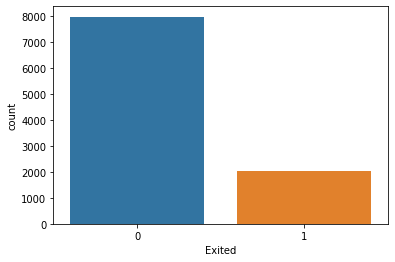

In [130]:
sns.countplot(data=dataset, x='Exited')
plt.show()


In [131]:
dataset.Exited.value_counts()
# Here 0 = 7963 and 1 = 2037
# 0 represent customer staying with the bank and 1 
# represent customer leaving the bank

0    7963
1    2037
Name: Exited, dtype: int64

## Correlation matrix and heatmap

In [132]:
dataset_2 = dataset.drop(columns=['Exited'])
dataset_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


[]

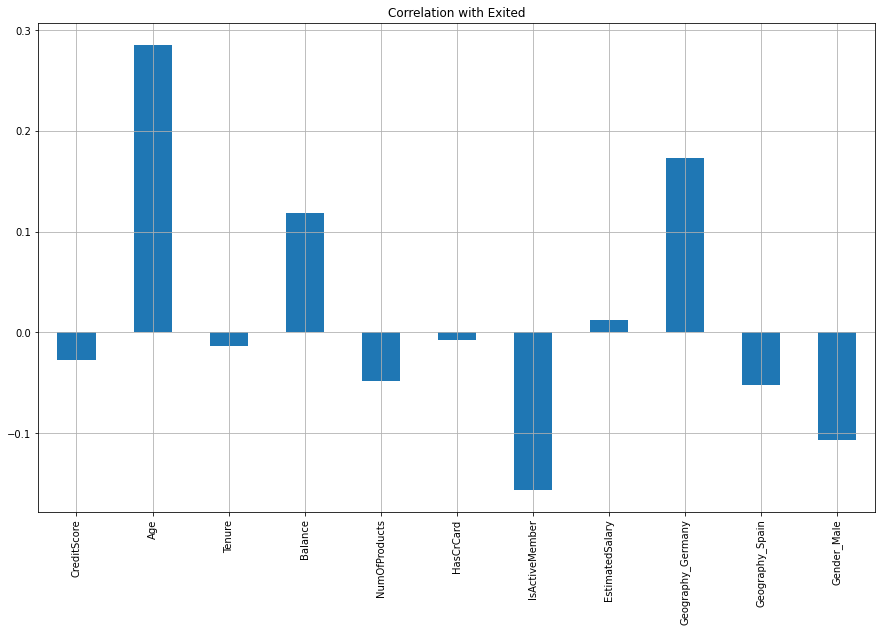

In [133]:
dataset_2.corrwith(dataset.Exited).plot.bar(
    figsize=(15,9),
    title='Correlation with Exited',
    rot=90,
    grid= True,
)
plt.plot()

In [134]:
corr=  dataset.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


[]

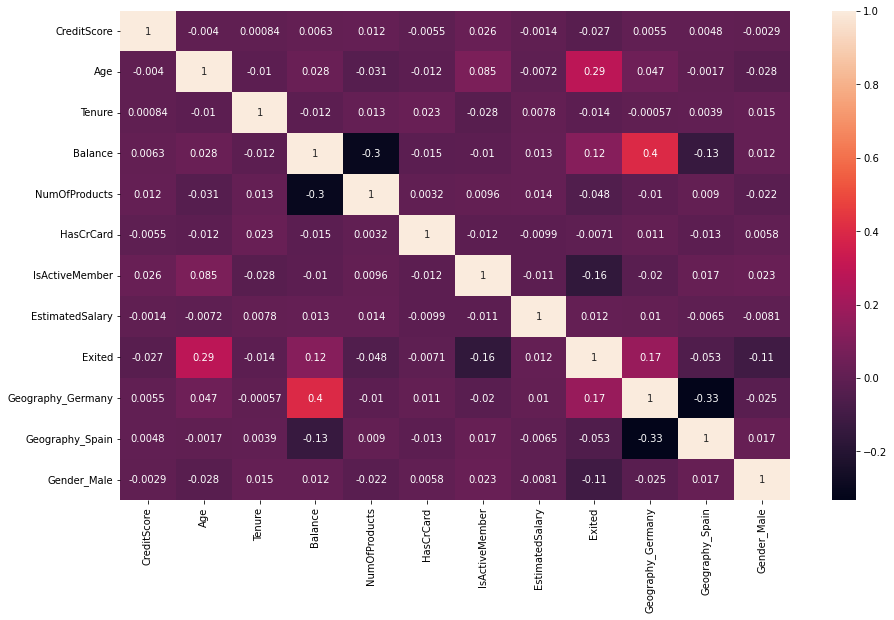

In [135]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True)
plt.plot()

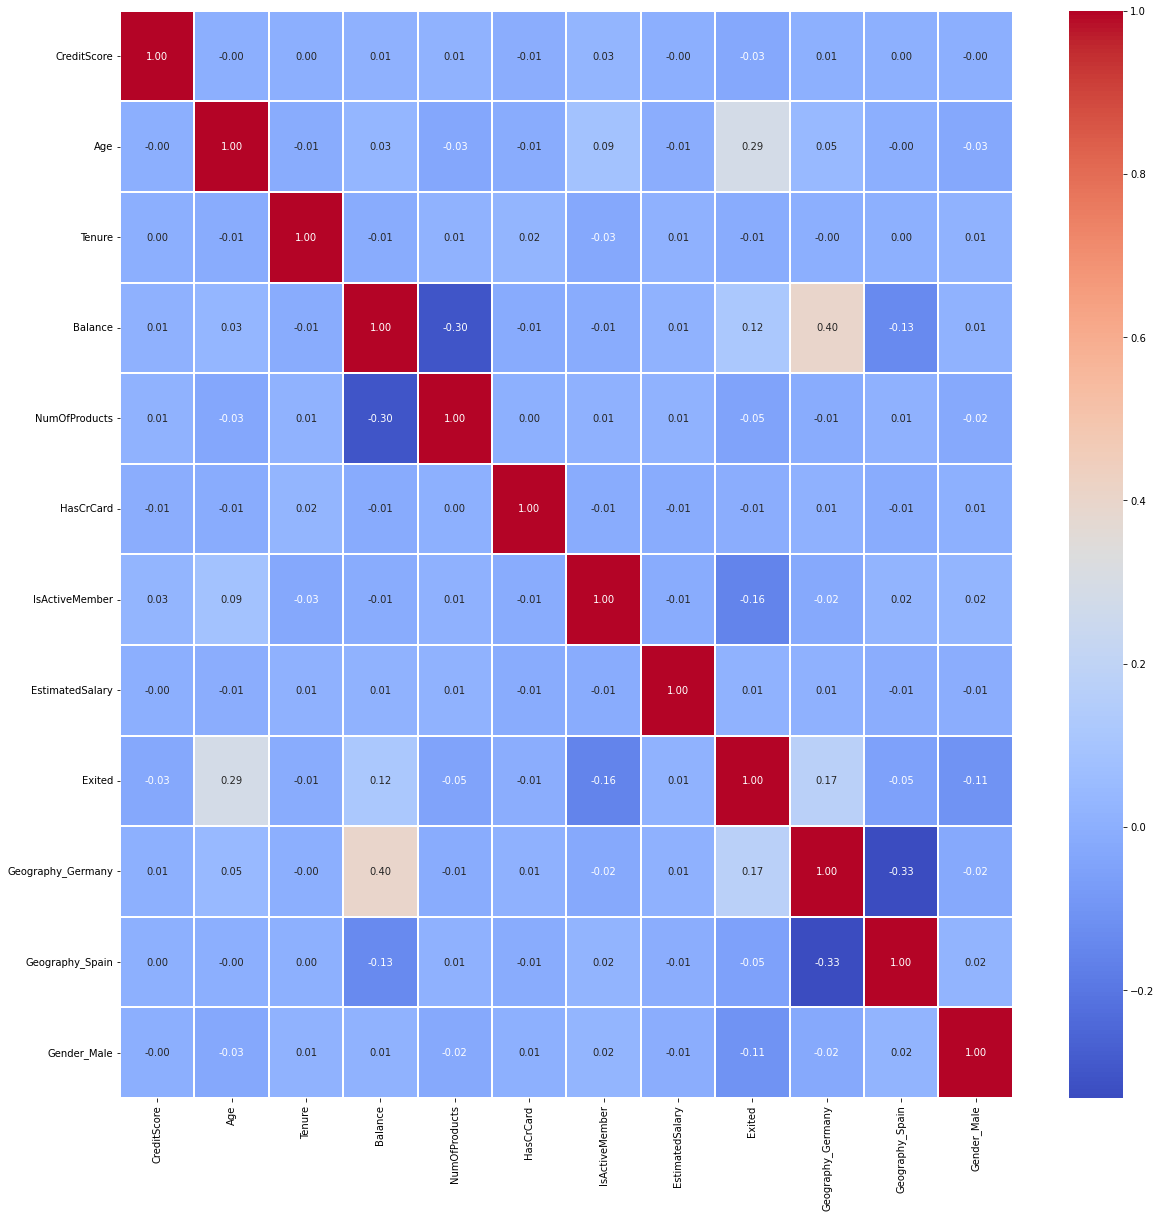

In [136]:
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=corr, annot=True,linewidths=0.2, fmt='.2f',cmap='coolwarm')
plt.show()

## Splitting the dataset into the Training set and Test set

In [137]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [138]:
#independent / matrix of features
x = dataset.drop(columns=['Exited'])

In [139]:
# target / dependent variable
y = dataset['Exited']
y.head()


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [140]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [142]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## Feature Scaling

In [143]:
# we apply feature scaling to get all the variable in the same scale
from sklearn.preprocessing import StandardScaler

In [144]:
sc = StandardScaler()

In [145]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [146]:
x_train, x_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -